In [1]:
import scipy as sp
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


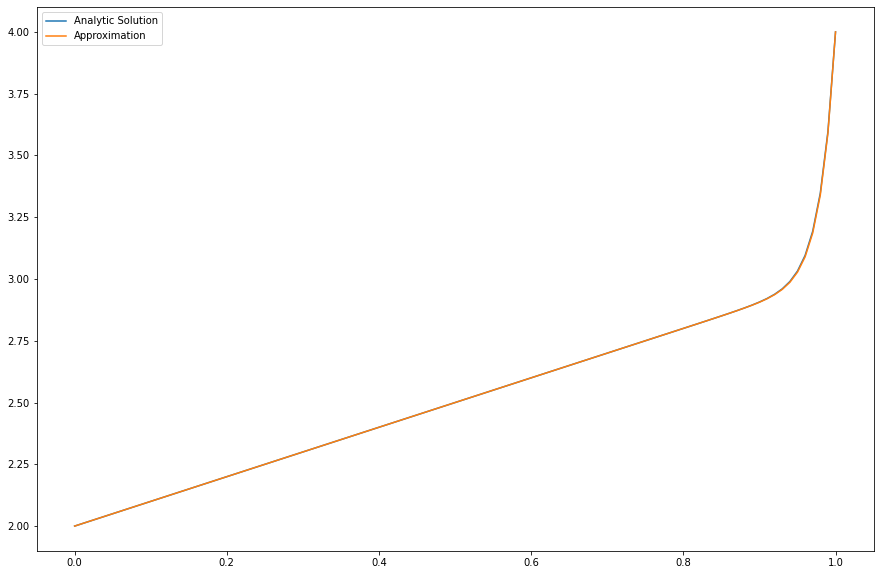

In [2]:
plt.figure(figsize=((15,10)))

#define our parameters
alpha = 2
beta = 4
eps = .02
N = 101

#get the analytic solution
analytical_soln = lambda x: alpha + x + (beta-alpha-1)*((np.exp(x/eps)-1)/(np.exp(1/eps)-1))

#create our grid of points
x = np.linspace(0,1,N)
h_step = (1-0)/(N-1)

#create our Matrix A using the values of a depending on the hat functions
bot_diag = np.ones(N-1)*((eps/h_step)+1/2)
bot_diag[-1] = 0
bot_mat = np.diag(bot_diag, k=-1)

mid_diag = np.ones(N)*((-eps/h_step)-(eps/h_step))
mid_diag[0], mid_diag[-1] = 1, 1
main_mat = np.diag(mid_diag)

top_diag = np.ones(N-1)*((eps/h_step)-1/2)
top_diag[0] = 0
top_mat = np.diag(top_diag, k=1)

A = top_mat + main_mat + bot_mat

#convert A to sparse
A = sparse.csr_matrix(A)

#create our phi vector
phi = np.ones(N)*-h_step
phi[0], phi[-1] = alpha, beta

#solve for K
K = spsolve(A, phi)

#plot the approximation against the analytic solution
plt.plot(x, analytical_soln(x), label='Analytic Solution')

plt.plot(x,K,label='Approximation')
plt.legend()
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

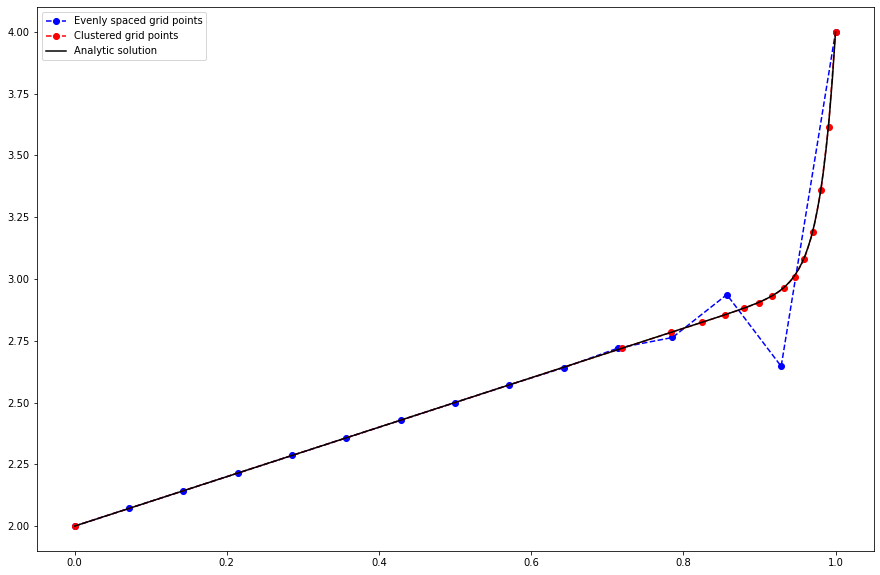

In [3]:
plt.figure(figsize=((15,10)))

#define our parameters
alpha = 2
beta = 4
a = 0
b = 1
eps = .02
N = 15

#create three different grids
even_grid = np.linspace(a,b,N)
clustered_grid = np.linspace(a,b,N)**(1/8)
x = np.linspace(0,1,250)

h_step = (b-a)/(N-1)

#create A for an evenly spaced grid
bot_diag = np.ones(N-1)*((eps/h_step)+1/2)
bot_diag[-1] = 0
bot_mat = np.diag(bot_diag, k=-1)

mid_diag = np.ones(N)*((-eps/h_step)-(eps/h_step))
mid_diag[0], mid_diag[-1] = 1, 1
main_mat = np.diag(mid_diag)

top_diag = np.ones(N-1)*((eps/h_step)-1/2)
top_diag[0] = 0
top_mat = np.diag(top_diag, k=1)


A = top_mat + main_mat + bot_mat
A = sparse.csr_matrix(A)

#create phi for an evenly spaced grid
phi = np.ones(N)*-h_step
phi[0], phi[-1] = alpha, beta

#solve for K in even case
K = spsolve(A, phi)

plt.plot(even_grid,K,'--b', marker='o', label='Evenly spaced grid points')

#create A for clustered grid
A = np.zeros((N,N))
for i in range(0,N):
    for j in range(1,N-1):
        if j == (i+1):
            A[j,i] = eps/(clustered_grid[i+1]-clustered_grid[i]) + 1/2
        
        elif j == i:
            A[j,i] = -1*(eps/(clustered_grid[i]-clustered_grid[i-1]) + eps/(clustered_grid[i+1]-clustered_grid[i]))
        
        elif j == (i-1):
            A[j,i] = eps/(clustered_grid[i]-clustered_grid[i-1]) - 1/2
        else:
            pass
A[0,0], A[-1,-1] = 1, 1
A = sparse.csr_matrix(A)

#create phi for clustered grid
phi = np.ones(N)
phi[0], phi[-1] = alpha, beta

for j in range(1,N-1):
    phi[j] = (-1/2) * (clustered_grid[j+1]-clustered_grid[j-1])

#solve for K in clustered case
K = spsolve(A, phi)
    
plt.plot(clustered_grid,K,'--r',marker='o', label='Clustered grid points')

#calculate the analytic solution over the domain        
analytical_soln = lambda x: alpha + x + (beta-alpha-1)*((np.exp(x/eps)-1)/(np.exp(1/eps)-1))
plt.plot(x, analytical_soln(x), color='black', label='Analytic solution')


plt.legend()
plt.show()

# Problem 3

Solve (11.5) with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error.

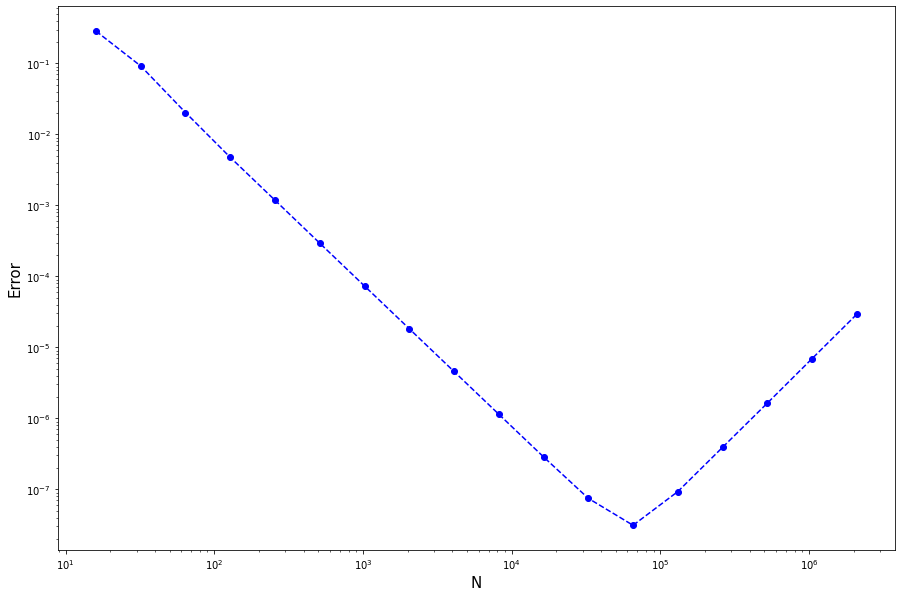

In [4]:
i_s = range(4,22)
plt.figure(figsize=((15,10)))

#define our parameters
alpha = 2
beta = 4
eps = .02

#calculate the analytic solution over the domain
analytical_soln = lambda x: alpha + x + (beta-alpha-1)*((np.exp(x/eps)-1)/(np.exp(1/eps)-1))
errors = []

for i in i_s:
    #for each number of elements create the grid
    N = 2**i
    grid = np.linspace(0,1,N)
    h_step = (1-0)/(N-1)
    
    #for each number of elements create our A matrix 
    bot_diag = np.ones(N)*((eps/h_step)+1/2)
    bot_diag[-2] = 0

    mid_diag = np.ones(N)*((-eps/h_step)-(eps/h_step))
    mid_diag[0], mid_diag[-1] = 1, 1

    top_diag = np.ones(N)*((eps/h_step)-1/2)
    top_diag[1] = 0
    
    diagonals = np.array([top_diag, mid_diag, bot_diag]).reshape(3,-1)
    A = spdiags(diagonals, [1,0,-1])
    
    #for each number of elements create our phi vector
    phi = np.ones(N)*-h_step
    phi[0], phi[-1] = alpha, beta
    
    A = sparse.csr_matrix(A)
    
    #solve for K
    K = spsolve(A, phi)
    
    #calculate the errors
    error = np.max(np.abs(K-analytical_soln(grid)))
    errors.append(error)

#plot the errors against the number of elements on a loglog scale
num_pts = [2**i for i in i_s]
plt.loglog(num_pts, errors,'--b',marker='o')
plt.xlabel('N',fontsize=15)
plt.ylabel('Error',fontsize=15)
plt.show()